In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-study-hour-v2/Student Study Hour V2.csv


**Prediction Using Supervised ML**


In this task, we will predict the scores that a student is expected to get based upon the number of hours they have studied. This task is based on simple linear regression model as it involves just two variables.

In [2]:
# Importing all libraries required in this notebook
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics 

**Step 1: Reading data from online source**

In [3]:
# Reading data from remote link
url =  '../input/student-study-hour-v2/Student Study Hour V2.csv'
student_data = pd.read_csv(url)
Study_Hours=np.asarray(student_data['Hours'])
Student_Scores=np.asarray(student_data['Scores'])
print(student_data)


    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86
25    1.3      19
26    2.6      30
27    6.1      63


**Step 2: Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels"(outputs).

In [4]:
x = student_data.iloc[:, :-1].values  
y = student_data.iloc[:, 1].values 

**Step 3: Data Visualization**

Plotting data points on 2-D graph to observe our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

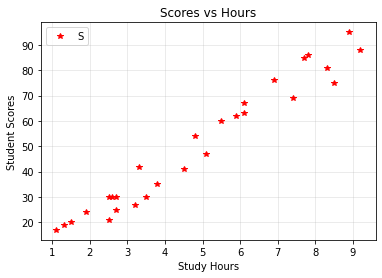

In [5]:
# plotting the distribution of Scores
plt.plot(x,y,'r*')
plt.xlabel('Study Hours')
plt.ylabel('Student Scores')
plt.title('Scores vs Hours')
plt.legend('Scores')
plt.grid(alpha=0.3)
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number Study hours and Student Scores.

**Step 4: Algorithm Training**

Splitting the data into training data-set and test data-set. Then, starting of training the algorithm.

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)
lg=linear_model.LinearRegression()
lg.fit(x_train,y_train)
print('Training Done')

Training Done


**Plotting the Line of Regression**

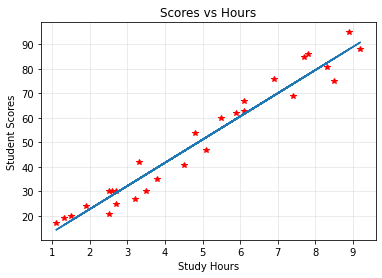

In [7]:
# Plotting the regression line
d=x*lg.coef_+lg.intercept_
# Plotting for the test data
plt.plot(x,y,'r*')
plt.xlabel('Study Hours')
plt.ylabel('Student Scores')
plt.title('Scores vs Hours')
plt.grid(alpha=0.3)
plt.plot(x,d)
plt.show()

**Step 5: Making Predictions**

Now that we have trained our algorithm, it's time to make some predictions.

In [8]:
print(x_test)  # Testing data - In Hours
y_pred = lg.predict(x_test) # Predicting the scores

[[7.7]
 [6.1]
 [5.9]
 [2.7]
 [4.8]
 [3.2]]


In [9]:
# Comparing Actual vs Predicted Scores
difference = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
print(difference)

   Actual  Predicted
0      85  76.722139
1      63  61.593158
2      62  59.702035
3      30  29.444072
4      54  49.300860
5      27  34.171879


In [10]:
# Testing our own data
Hrs=9.25
Predicted_Score = lg.predict([[Hrs]])
print("No of Hours = {}".format(Hrs))
print("Predicted Score = {}".format(Predicted_Score[0]))

No of Hours = 9.25
Predicted Score = 91.3783397661833


**Step 6: Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. Here, we have chosen the mean absolute error, mean squared error, root mean squared error. There are many such metrics.

In [11]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root mean squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.068269048927878
Mean Squared Error: 24.93494113592172
Root mean squared Error: 4.993489875419967
